In [15]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist

#Cargue la división de prueba y entrenamiento del conjunto de datos mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar los valores de píxeles del tren y probar las imágenes
training_images = training_images/255.0
test_images = test_images/255.0

In [16]:
# Construir el modelo de clasificación
model = keras.models.Sequential([
    # Agregar convoluciones y max pooling 
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    # Agregar las mismas capas que antes.
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='softmax')])

model.summary()

d:\Academia\Talent-tech\AI\.env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 709,184 (2.71 MB)

 Trainable params: 709,184 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8883 - loss: 0.4344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9821 - loss: 0.0604
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9876 - loss: 0.0399
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9925 - loss: 0.0249
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9948 - loss: 0.0171
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9965 - loss: 0.0108
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9973 - loss: 0.0080
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9979 - loss: 0.0059
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9983 - loss: 0.0053
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9984 - loss: 0.0046


<Axes: >

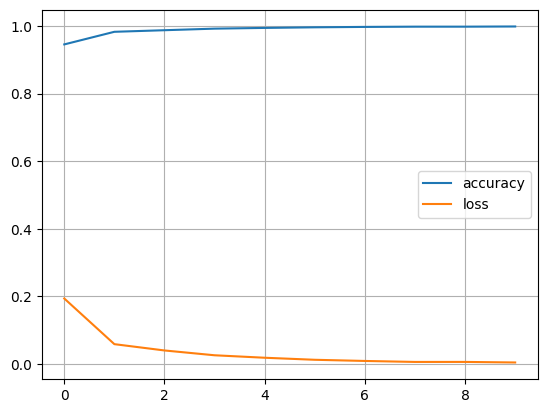

In [17]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [18]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento: ", loss)
print("Precisión en el conjunto de entrenamiento: ", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9989 - loss: 0.0035
Pérdida en el conjunto de entrenamiento:  0.003480292158201337
Precisión en el conjunto de entrenamiento:  0.9988666772842407
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0706
Pérdida en el conjunto de prueba: 0.05349888280034065
Precisión en el conjunto de prueba: 0.9872000217437744


In [19]:
# Predict 
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification: \n {classification.reshape(-1, 1)}')

Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Classification: 
 [[8.8624133e-13]
 [6.0671773e-10]
 [1.0000000e+00]
 [1.4324722e-15]
 [5.7774252e-18]
 [7.9797700e-20]
 [2.6917015e-15]
 [2.2338471e-17]
 [3.3060784e-15]
 [1.9325268e-12]
 [2.5918847e-22]
 [5.0164798e-22]
 [9.5871810e-20]
 [2.6502352e-21]
 [1.5147612e-20]
 [2.8763610e-23]
 [8.2385597e-23]
 [1.1937944e-20]
 [9.6836556e-22]
 [7.7390304e-22]
 [3.0893595e-23]
 [1.1166071e-22]
 [2.6679778e-20]
 [1.2544162e-21]
 [5.8589616e-20]
 [4.1456612e-22]
 [2.7168327e-21]
 [1.3848831e-21]
 [1.3897308e-21]
 [1.2774414e-20]
 [2.8703607e-19]
 [1.2403884e-21]
 [7.2619900e-24]
 [2.6874557e-21]
 [4.9264154e-24]
 [5.7574396e-21]
 [9.0489086e-23]
 [1.1850860e-22]
 [1.0268671e-22]
 [4.6141907e-23]
 [3.4560575e-21]
 [8.8315778e-22]
 [3.5865116e-22]
 [7.0973227e-21]
 [1.0170097e-19]
 [1.3011263e-21]
 [4.8144658e-22]
 [8.2579695e-24]
 [8.9688360e-23]
 [1.6837688e-22]
 [2.9510060e-22]
 [3.1894610e-21]
 [5.9921794e-22]
 [6.4788442e-22]
 [2.0728108e-21]


In [20]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [21]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE =25

print(test_labels[FIRST_IMAGE])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])



0
0
0


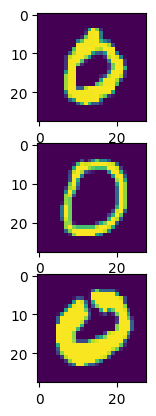

In [22]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])


In [28]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title("Image Input")
axarr[0, 0].imshow(test_images[FIRST_IMAGE])
f1 =activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer"+ str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer"+ str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(test_images[SECOND_IMAGE])
f2 =activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(test_images[THIRD_IMAGE])
f3 =activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])


ValueError: The layer sequential_1 has never been called and thus has no defined input.